In [182]:
import torch
import torch.nn as nn
import numpy as np

In [183]:
from nltk import FreqDist
from nltk.corpus import stopwords

In [184]:


text = """Man and women are the two genders. Strongest man will be awarded as the king and strongest women will be awarded
as the queen. King job is to protect from enemy and queen job is to take care of their people.Enemey used to attack king 
as he is the most strongest person and queen used to protect his king"""
sample_words = text.split()
sample_words = [word for word in sample_words if word not in stopwords.words('english')]
text = " ".join(sample_words)
text = text.replace(',','').replace('.','').lower().split()



In [208]:
corpus = set(text)
corpus_length = len(corpus)

word_dict = {}
inverse_word_dict = {}

for i, word in enumerate(corpus):
    word_dict[word] = i
    inverse_word_dict[i] = word

data = []

for i in range(2, len(text) - 2):
    target = [ text[i-1],
               text[i+1]]
    sentence = text[i]
    sentence = text[i+1]
    target = text[i]
    data.append((sentence, target))
    sentence = text[i+1]
    target = text[i+2]
    data.append((sentence, target))
    
print(data[2])

('strongest', 'genders')


In [209]:
embedding_length = 20

class skipgram(torch.nn.Module):

    def __init__(self, corpus_length, embedding_dim):
        super(skipgram, self).__init__()
        
        self.embeddings = nn.Embedding(corpus_length, embedding_dim)

        self.linear1 = nn.Linear(embedding_dim, 64)
        self.linear2 = nn.Linear(64, corpus_length)
        
        self.activation_function1 = nn.ReLU()
        self.activation_function2 = nn.LogSoftmax(dim = -1)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out).view(1,-1)
        return out

    def get_word_emdedding(self, word):
        word = torch.LongTensor([word_dict[word]])
        return self.embeddings(word).view(1,-1)


In [210]:
model = CBoW(corpus_length, embedding_length)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def make_sentence_vector(sentence, word_dict):
    idxs = [word_dict[w] for w in sentence]
    return torch.tensor(idxs, dtype=torch.long)

print(make_sentence_vector(['women', 'genders'], word_dict))

tensor([ 9, 13])


In [223]:
for epoch in range(200):
    epoch_loss = 0
    for sentence, target in data:
        model.zero_grad()
        #sentence_vector = make_sentence_vector(sentence, word_dict)  
        log_probs = model(torch.tensor([word_dict[sentence]], dtype=torch.long))
        loss = loss_function(log_probs, (torch.tensor([word_dict[target]], dtype=torch.long)))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.data
    print('Epoch: '+str(epoch)+', Loss: ' + str(epoch_loss.item()))

Epoch: 0, Loss: 452.3771667480469
Epoch: 1, Loss: 294.243408203125
Epoch: 2, Loss: 214.27259826660156
Epoch: 3, Loss: 173.4977264404297
Epoch: 4, Loss: 150.9813232421875
Epoch: 5, Loss: 137.49966430664062
Epoch: 6, Loss: 128.59072875976562
Epoch: 7, Loss: 122.08921813964844
Epoch: 8, Loss: 117.04112243652344
Epoch: 9, Loss: 112.90396118164062
Epoch: 10, Loss: 109.3457260131836
Epoch: 11, Loss: 106.23309326171875
Epoch: 12, Loss: 103.46849822998047
Epoch: 13, Loss: 100.98056030273438
Epoch: 14, Loss: 98.7390365600586
Epoch: 15, Loss: 96.6923599243164
Epoch: 16, Loss: 94.84965515136719
Epoch: 17, Loss: 93.13534545898438
Epoch: 18, Loss: 91.6253433227539
Epoch: 19, Loss: 90.22467803955078
Epoch: 20, Loss: 88.99430847167969
Epoch: 21, Loss: 87.87500762939453
Epoch: 22, Loss: 86.75820922851562
Epoch: 23, Loss: 85.84088134765625
Epoch: 24, Loss: 84.97879028320312
Epoch: 25, Loss: 84.1889877319336
Epoch: 26, Loss: 83.4988784790039
Epoch: 27, Loss: 82.8825912475586
Epoch: 28, Loss: 82.32736968

In [226]:
def get_predicted_result(input, inverse_word_dict):
    index = np.argmax(input)
    return inverse_word_dict[index]

def predict_sentence(sentence):
    sentence_split = sentence.replace('.','').lower().split()
    sentence_vector = make_sentence_vector(sentence_split, word_dict)
    prediction_array = model(sentence_vector).data.numpy()
    print('Preceding Words: {}\n'.format(sentence_split[:2]))
    print('Predicted Word: {}\n'.format(get_predicted_result(prediction_array[0], inverse_word_dict)))
    #print('Following Words: {}\n'.format(sentence_split[2:]))

In [227]:
predict_sentence("king")

Preceding Words: ['king']

Predicted Word: strongest



In [229]:
# Learned W
a,b,c,d,_ = model.parameters()
#print(W.detach())

In [230]:
word_list = list(set(text))


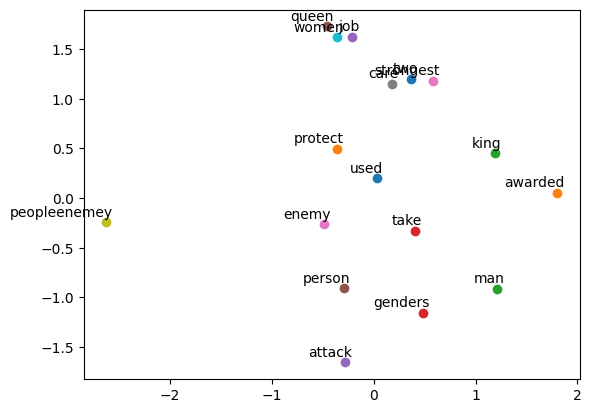

In [231]:
import matplotlib.pyplot as plt
for i, word in enumerate(word_list):
    
    W = a.detach()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()